##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [ ]:
!pip install numpy==1.24.4

In [ ]:
!pip install -q mediapipe

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [ ]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

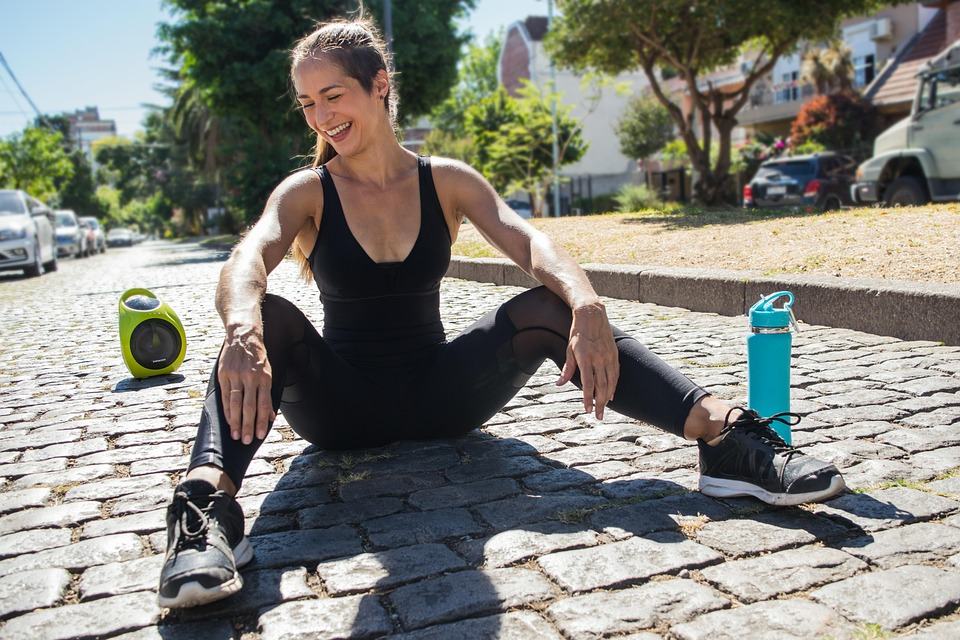

In [ ]:
#!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

#import cv2
#from google.colab.patches import cv2_imshow

#img = cv2.imread("image.jpg")
#cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

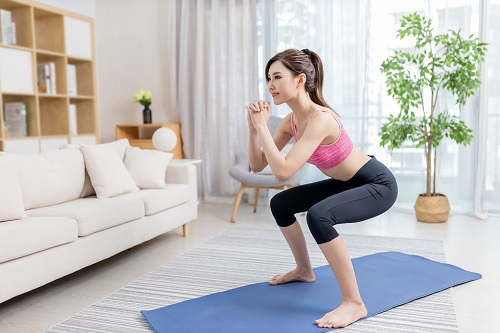

In [ ]:
from google.colab import files
#uploaded = files.upload()

#for filename in uploaded:
#  content = uploaded[filename]
#  with open(filename, 'wb') as f:
#    f.write(content)
#if len(uploaded.keys()):
#  IMAGE_FILE = next(iter(uploaded))
#  print('Uploaded file:', IMAGE_FILE)

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/KakaoTalk_20250325_190109677.jpg")
cv2_imshow(img)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


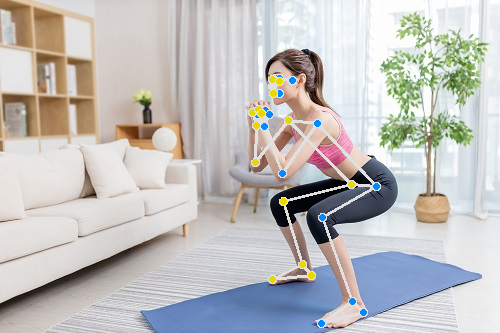

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/KakaoTalk_20250325_190109677.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

In [ ]:
# Í∞Å ÎûúÎìúÎßàÌÅ¨Ïùò (x, y, z) Ï¢åÌëú Ï∂úÎ†•
for idx, pose_landmarks in enumerate(detection_result.pose_landmarks):
    print(f"Person {idx + 1}:")
    for i, landmark in enumerate(pose_landmarks):
        print(f"  Landmark {i}: (x={landmark.x}, y={landmark.y}, z={landmark.z})")


Person 1:
  Landmark 0: (x=0.5450378656387329, y=0.26113057136535645, z=-0.20304840803146362)
  Landmark 1: (x=0.5507463216781616, y=0.23607808351516724, z=-0.2114609032869339)
  Landmark 2: (x=0.5544482469558716, y=0.23561713099479675, z=-0.21175043284893036)
  Landmark 3: (x=0.558973491191864, y=0.23536372184753418, z=-0.21175885200500488)
  Landmark 4: (x=0.545982837677002, y=0.23834165930747986, z=-0.17911118268966675)
  Landmark 5: (x=0.5451750159263611, y=0.23896726965904236, z=-0.1795012205839157)
  Landmark 6: (x=0.544092059135437, y=0.23973619937896729, z=-0.1797017902135849)
  Landmark 7: (x=0.584148645401001, y=0.24319714307785034, z=-0.2061571329832077)
  Landmark 8: (x=0.5582824945449829, y=0.24612706899642944, z=-0.06334871053695679)
  Landmark 9: (x=0.5598926544189453, y=0.2816983759403229, z=-0.19883190095424652)
  Landmark 10: (x=0.5478382110595703, y=0.2817396819591522, z=-0.15926168859004974)
  Landmark 11: (x=0.6354637742042542, y=0.37033045291900635, z=-0.252114355

In [ ]:
import math

def calculate_angle(a, b, c):
    """
    ÏÑ∏ Ï†ê a, b, cÏóê ÎåÄÌï¥ Î≤°ÌÑ∞ BAÏôÄ BC ÏÇ¨Ïù¥Ïùò Í∞ÅÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    a, b, cÎäî (x, y, z) Ï¢åÌëúÎ•º Í∞ñÎäî ÌäúÌîå ÎòêÎäî Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§.
    """
    ba = [a[i] - b[i] for i in range(3)]
    bc = [c[i] - b[i] for i in range(3)]

    # Î≤°ÌÑ∞ ÎÇ¥Ï†ÅÍ≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
    dot_product = sum(ba[i] * bc[i] for i in range(3))
    mag_ba = math.sqrt(sum(ba[i] ** 2 for i in range(3)))
    mag_bc = math.sqrt(sum(bc[i] ** 2 for i in range(3)))

    # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Í≤ÉÏùÑ Î∞©ÏßÄ
    if mag_ba * mag_bc == 0:
        return None

    # Í∞ÅÎèÑ Í≥ÑÏÇ∞ (ÎùºÎîîÏïà -> ÎèÑ)
    cos_angle = dot_product / (mag_ba * mag_bc)
    # Î≤îÏúÑ Î≥¥Ï†ï (Î∂ÄÎèôÏÜåÏàòÏ†ê Ïò§Î•ò Î∞©ÏßÄ)
    cos_angle = max(min(cos_angle, 1.0), -1.0)
    angle_rad = math.acos(cos_angle)
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# ÏòàÏãú: Person 1Ïóê ÎåÄÌï¥ Î¨¥Î¶éÍ≥º ÏóâÎç©Ïù¥ Í∞ÅÎèÑ Í≥ÑÏÇ∞
pose = detection_result.pose_landmarks[0]

# ÌïÑÏöîÌïú Ï¢åÌëú Ï∂îÏ∂ú
hip = [pose[24].x, pose[24].y, pose[24].z]
knee = [pose[26].x, pose[26].y, pose[26].z]
ankle = [pose[28].x, pose[28].y, pose[28].z]
shoulder = [pose[12].x, pose[12].y, pose[12].z]

# Í∞ÅÎèÑ Í≥ÑÏÇ∞
knee_angle = calculate_angle(hip, knee, ankle)
hip_angle = calculate_angle(shoulder, hip, knee)

print(f"Ïò§Î•∏Ï™Ω Î¨¥Î¶é Í∞ÅÎèÑ (24-26-28): {knee_angle:.1f}")
print(f"Ïò§Î•∏Ï™Ω ÏóâÎç©Ïù¥ Í∞ÅÎèÑ (12-24-26): {hip_angle:.2f}")


Ïò§Î•∏Ï™Ω Î¨¥Î¶é Í∞ÅÎèÑ (24-26-28): 97.5
Ïò§Î•∏Ï™Ω ÏóâÎç©Ïù¥ Í∞ÅÎèÑ (12-24-26): 73.23


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
from IPython.display import display, Javascript

# MediaPipe Pose ÏÑ§Ï†ï
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# ÏõπÏ∫†ÏóêÏÑú ÌîÑÎ†àÏûÑÏùÑ Í∞ÄÏ†∏Ïò§Îäî JavaScript ÏΩîÎìú
def video_stream():
    js = Javascript('''
        async function startStream() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const ctx = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            video.srcObject = stream;
            await video.play();

            document.body.appendChild(video);
            document.body.appendChild(canvas);
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            function captureFrame() {
                ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
                return canvas.toDataURL('image/jpeg', 0.8);
            }

            return new Promise((resolve) => {
                setInterval(() => resolve(captureFrame()), 100);
            });
        }
    ''')
    display(js)
    return eval_js('startStream()')

# ÏõπÏ∫† ÌîÑÎ†àÏûÑ Í∞ÄÏ†∏Ïò§Í∏∞
def process_frame():
    frame_data = video_stream()
    binary = b64decode(frame_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(binary))
    image = np.array(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCVÏö© BGR Î≥ÄÌôò

# Îëê Ï†ê Í∞ÑÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# OK Ï†úÏä§Ï≤ò Í∞êÏßÄ Ïó¨Î∂Ä
def is_ok_gesture(landmarks):
    if landmarks:
        wrist = landmarks[mp_pose.PoseLandmark.WRIST.value]
        thumb_tip = landmarks[mp_pose.PoseLandmark.THUMB_TIP.value]
        index_tip = landmarks[mp_pose.PoseLandmark.INDEX_FINGER_TIP.value]

        # ÏóÑÏßÄÏôÄ Í≤ÄÏßÄÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞
        distance_thumb_index = calculate_distance(thumb_tip, index_tip)

        # ÌäπÏ†ï Í±∞Î¶¨ Ïù¥ÌïòÎ©¥ "OK Ï†úÏä§Ï≤ò"Î°ú ÌåêÎã®
        if distance_thumb_index < 0.05:  # (Í∞íÏùÄ Ï°∞Ï†ï Í∞ÄÎä•)
            print("OK Ï†úÏä§Ï≤ò Í∞êÏßÄÎê®! Ïä§Ìä∏Î¶¨Î∞çÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            return True
    return False

# Ïã§ÏãúÍ∞Ñ Pose Detection Ïã§Ìñâ
frame_count = 0
max_frames = 30  # ÏµúÎåÄ ÌîÑÎ†àÏûÑ Ïàò (OK Í∞êÏßÄ Ï†ÑÏóê Ï¢ÖÎ£å Î∞©ÏßÄ)
ok_detected_count = 0  # OK Ï†úÏä§Ï≤ò Í∞êÏßÄ ÌöüÏàò (Ïó∞ÏÜç Í∞êÏßÄ Ïó¨Î∂Ä ÌôïÏù∏)
ok_threshold = 5  # Ïó∞ÏÜç OK Í∞êÏßÄ ÌöüÏàò Í∏∞Ï§Ä

while frame_count < max_frames:
    frame = process_frame()

    # Ìè¨Ï¶à Í∞êÏßÄ
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    frame_landmarks = []
    if results.pose_landmarks:
        # ÎûúÎìúÎßàÌÅ¨ Ï†ÄÏû•
        for landmark in results.pose_landmarks.landmark:
            frame_landmarks.append((landmark.x, landmark.y))

        # OK Ï†úÏä§Ï≤ò Í∞êÏßÄ
        if is_ok_gesture(frame_landmarks):
            ok_detected_count += 1
        else:
            ok_detected_count = 0  # Í∞êÏßÄ Ïã§Ìå® Ïãú Ï¥àÍ∏∞Ìôî

        # OK Ï†úÏä§Ï≤ò ÏùºÏ†ï ÌöüÏàò Ïù¥ÏÉÅ Í∞êÏßÄ Ïãú Ï¢ÖÎ£å
        if ok_detected_count >= ok_threshold:
            print("‚úÖ Ïó∞ÏÜç OK Ï†úÏä§Ï≤ò Í∞êÏßÄ! Ïä§Ìä∏Î¶¨Î∞çÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            break

        # ÎûúÎìúÎßàÌÅ¨ ÌôîÎ©¥Ïóê ÌëúÏãú
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Ïã§ÏãúÍ∞Ñ Ï∂úÎ†• (Colab ÌôòÍ≤ΩÏóêÏÑú cv2.imshow ÎåÄÏã† cv2_imshow ÏÇ¨Ïö©)
    cv2_imshow(frame)

    frame_count += 1  # ÌîÑÎ†àÏûÑ Í∞úÏàò Ï¶ùÍ∞Ä
    print(f"üì∏ ÌòÑÏû¨ ÌîÑÎ†àÏûÑ: {frame_count}/{max_frames}")

# Í∏∞Ï°¥ ÎπÑÎîîÏò§ ÏöîÏÜå Ï†úÍ±∞ÌïòÎäî JavaScript Ï∂îÍ∞Ä
def remove_video_elements():
    js = Javascript('''
        function removeVideos() {
            let videos = document.querySelectorAll('video');
            let canvases = document.querySelectorAll('canvas');
            videos.forEach(video => video.remove());
            canvases.forEach(canvas => canvas.remove());
        }
        removeVideos();
    ''')
    display(js)

# Ï¢ÖÎ£å Î©îÏãúÏßÄ
print("üöÄ OK Ï†úÏä§Ï≤ò Í∞êÏßÄÎ°ú Ïù∏Ìï¥ Ïä§Ìä∏Î¶¨Î∞çÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")

# ÎπÑÎîîÏò§ ÏöîÏÜå Ï†úÍ±∞
remove_video_elements()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io
from IPython.display import display, Javascript

# MediaPipe Pose ÏÑ§Ï†ï
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# ÏõπÏ∫†ÏóêÏÑú ÌîÑÎ†àÏûÑÏùÑ Í∞ÄÏ†∏Ïò§Îäî JavaScript ÏΩîÎìú
def video_stream():
    js = Javascript('''
        async function startStream() {
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const ctx = canvas.getContext('2d');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            video.srcObject = stream;
            await video.play();

            document.body.appendChild(video);
            document.body.appendChild(canvas);
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            function captureFrame() {
                ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
                return canvas.toDataURL('image/jpeg', 0.8);
            }

            return new Promise((resolve) => {
                setInterval(() => resolve(captureFrame()), 100);
            });
        }
    ''')
    display(js)
    return eval_js('startStream()')

# ÏõπÏ∫† ÌîÑÎ†àÏûÑ Í∞ÄÏ†∏Ïò§Í∏∞
def process_frame():
    frame_data = video_stream()
    binary = b64decode(frame_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(binary))
    image = np.array(image)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCVÏö© BGR Î≥ÄÌôò

# Ïã§ÏãúÍ∞Ñ Pose Detection Ïã§Ìñâ (Ï¥ù 10Í∞ú ÌîÑÎ†àÏûÑ ÌõÑ Ï¢ÖÎ£å & ÎûúÎìúÎßàÌÅ¨ Î∞òÌôò)
frame_count = 0
max_frames = 10  # Ï∫°Ï≤òÌï† ÌîÑÎ†àÏûÑ Í∞úÏàò
landmark_list = []  # ÎûúÎìúÎßàÌÅ¨ Ï†ÄÏû• Î¶¨Ïä§Ìä∏

while frame_count < max_frames:
    frame = process_frame()

    # Ìè¨Ï¶à Í∞êÏßÄ
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    frame_landmarks = []
    if results.pose_landmarks:
        # ÎûúÎìúÎßàÌÅ¨ Í∞êÏßÄ ÌõÑ Ï†ÄÏû•
        for landmark in results.pose_landmarks.landmark:
            frame_landmarks.append((landmark.x, landmark.y, landmark.z))

        # ÌîÑÎ†àÏûÑ Î≤àÌò∏ÏôÄ Ìï®Íªò Ï†ÄÏû•
        landmark_list.append((frame_count, frame_landmarks))

        # ÎûúÎìúÎßàÌÅ¨ ÌôîÎ©¥Ïóê ÌëúÏãú
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Ïã§ÏãúÍ∞Ñ Ï∂úÎ†• (Colab ÌôòÍ≤ΩÏóêÏÑú cv2.imshow ÎåÄÏã† cv2_imshow ÏÇ¨Ïö©)
    cv2_imshow(frame)

    frame_count += 1  # ÌîÑÎ†àÏûÑ Í∞úÏàò Ï¶ùÍ∞Ä
    print(f"üì∏ ÌòÑÏû¨ ÌîÑÎ†àÏûÑ: {frame_count}/{max_frames}")

# Í∏∞Ï°¥ ÎπÑÎîîÏò§ ÏöîÏÜå Ï†úÍ±∞ÌïòÎäî JavaScript Ï∂îÍ∞Ä
def remove_video_elements():
    js = Javascript('''
        function removeVideos() {
            let videos = document.querySelectorAll('video');
            let canvases = document.querySelectorAll('canvas');
            videos.forEach(video => video.remove());
            canvases.forEach(canvas => canvas.remove());
        }
        removeVideos();
    ''')
    display(js)

# Ï¢ÖÎ£å Î©îÏãúÏßÄ
print("!!!!!!!!!!!!!!10Í∞úÏùò ÌîÑÎ†àÏûÑÏùÑ Ï≤òÎ¶¨ ÏôÑÎ£åÌñàÏäµÎãàÎã§. Ïä§Ìä∏Î¶¨Î∞çÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.!!!!!!!!!!!!!!!!!!!")

# ÎûúÎìúÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞ Î∞òÌôò
print(f"üìå Ï¥ù {len(landmark_list)}Í∞ú ÌîÑÎ†àÏûÑÏùò ÎûúÎìúÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")
for i, (frame_idx, landmarks) in enumerate(landmark_list[:9]):  # Ï¢åÌëú Ï∂úÎ†•
    print(f"üñº ÌîÑÎ†àÏûÑ {frame_idx} - Ï≤´ Î≤àÏß∏ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú: {landmarks[0]}")

landmark_list  # ÎûúÎìúÎßàÌÅ¨ Îç∞Ïù¥ÌÑ∞ Î∞òÌôò
remove_video_elements()  # ÎÇ®ÏïÑ ÏûàÎäî ÏòÅÏÉÅ ÏöîÏÜå ÏÇ≠Ï†ú
